In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data preparation

In [30]:
import os
os.getcwd()
os.chdir("D:\Downloads")

In [31]:
defaultCC = pd.read_csv('UCI_Credit_Card.csv', index_col = 'ID')

In [32]:
defaultCC_1 = defaultCC.copy()

In [33]:
defaultCC.head(4)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  

[4 rows x 24 columns]

In [25]:
defaultCC.rename(columns = lambda x:x.lower(), inplace=True)

In [26]:
defaultCC.head(10)

limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   
6     50000.0    1          1         2   37      0      0      0      0   
7    500000.0    1          1         2   29      0      0      0      0   
8    100000.0    2          2         2   23      0     -1     -1      0   
9    140000.0    2          3         1   28      0      0      2      0   
10    20000.0    1          3         2   35     -2     -2     -2     -2   

    pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  pay_amt3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
6       0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
7       0  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
8       0  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
9       0  ...    12211.0    11793.0     3719.0    3329.0       0.0     432.0   
10     -1  ...        0.0    13007.0    13912.0       0.0       0.0       0.0   

    pay_amt4  pay_amt5  pay_amt6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  
6     1000.0    1000.0     800.0                           0  
7    20239.0   13750.0   13770.0                           0  
8      581.0    1687.0    1542.0                           0  
9     1000.0    1000.0    1000.0                           0  
10   13007.0    1122.0       0.0                           0  

[10 rows x 24 columns]

In [27]:
#Base Values : female, other_education, not_married

In [28]:
defaultCC['grad_school'] = (defaultCC['education'] == 1).astype('int')
defaultCC['university'] = (defaultCC['education'] == 2).astype('int')
defaultCC['high_school'] = (defaultCC['education'] == 3).astype('int')
defaultCC.drop(['education'],1,inplace = True)

In [9]:
defaultCC.head(10)

limit_bal  sex  marriage  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  \
ID                                                                            
1     20000.0    2         1   24      2      2     -1     -1     -2     -2   
2    120000.0    2         2   26     -1      2      0      0      0      2   
3     90000.0    2         2   34      0      0      0      0      0      0   
4     50000.0    2         1   37      0      0      0      0      0      0   
5     50000.0    1         1   57     -1      0     -1      0      0      0   
6     50000.0    1         2   37      0      0      0      0      0      0   
7    500000.0    1         2   29      0      0      0      0      0      0   
8    100000.0    2         2   23      0     -1     -1      0      0     -1   
9    140000.0    2         1   28      0      0      2      0      0      0   
10    20000.0    1         2   35     -2     -2     -2     -2     -1     -1   

    ...  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
ID  ...                                                               
1   ...       0.0     689.0       0.0       0.0       0.0       0.0   
2   ...       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
3   ...    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
4   ...    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
5   ...    2000.0   36681.0   10000.0    9000.0     689.0     679.0   
6   ...    2500.0    1815.0     657.0    1000.0    1000.0     800.0   
7   ...   55000.0   40000.0   38000.0   20239.0   13750.0   13770.0   
8   ...     380.0     601.0       0.0     581.0    1687.0    1542.0   
9   ...    3329.0       0.0     432.0    1000.0    1000.0    1000.0   
10  ...       0.0       0.0       0.0   13007.0    1122.0       0.0   

    default.payment.next.month  grad_school  university  high_school  
ID                                                                    
1                            1            0           1            0  
2                            1            0           1            0  
3                            0            0           1            0  
4                            0            0           1            0  
5                            0            0           1            0  
6                            0            1           0            0  
7                            0            1           0            0  
8                            0            0           1            0  
9                            0            0           0            1  
10                           0            0           0            1  

[10 rows x 26 columns]

In [10]:
defaultCC['male'] = (defaultCC['sex'] == 1).astype('int')
defaultCC.drop(['sex'],1,inplace=True)

In [11]:
defaultCC.head(10)

limit_bal  marriage  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  \
ID                                                                       
1     20000.0         1   24      2      2     -1     -1     -2     -2   
2    120000.0         2   26     -1      2      0      0      0      2   
3     90000.0         2   34      0      0      0      0      0      0   
4     50000.0         1   37      0      0      0      0      0      0   
5     50000.0         1   57     -1      0     -1      0      0      0   
6     50000.0         2   37      0      0      0      0      0      0   
7    500000.0         2   29      0      0      0      0      0      0   
8    100000.0         2   23      0     -1     -1      0      0     -1   
9    140000.0         1   28      0      0      2      0      0      0   
10    20000.0         2   35     -2     -2     -2     -2     -1     -1   

    bill_amt1  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
ID             ...                                                     
1      3913.0  ...     689.0       0.0       0.0       0.0       0.0   
2      2682.0  ...    1000.0    1000.0    1000.0       0.0    2000.0   
3     29239.0  ...    1500.0    1000.0    1000.0    1000.0    5000.0   
4     46990.0  ...    2019.0    1200.0    1100.0    1069.0    1000.0   
5      8617.0  ...   36681.0   10000.0    9000.0     689.0     679.0   
6     64400.0  ...    1815.0     657.0    1000.0    1000.0     800.0   
7    367965.0  ...   40000.0   38000.0   20239.0   13750.0   13770.0   
8     11876.0  ...     601.0       0.0     581.0    1687.0    1542.0   
9     11285.0  ...       0.0     432.0    1000.0    1000.0    1000.0   
10        0.0  ...       0.0       0.0   13007.0    1122.0       0.0   

    default.payment.next.month  grad_school  university  high_school  male  
ID                                                                          
1                            1            0           1            0     0  
2                            1            0           1            0     0  
3                            0            0           1            0     0  
4                            0            0           1            0     0  
5                            0            0           1            0     1  
6                            0            1           0            0     1  
7                            0            1           0            0     1  
8                            0            0           1            0     0  
9                            0            0           0            1     0  
10                           0            0           0            1     1  

[10 rows x 26 columns]

In [12]:
defaultCC['married'] = (defaultCC['marriage'] == 1).astype('int')
defaultCC.drop(['marriage'],1,inplace=True)

In [13]:
defaultCC.head(10)

limit_bal  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
ID                                                                        
1     20000.0   24      2      2     -1     -1     -2     -2     3913.0   
2    120000.0   26     -1      2      0      0      0      2     2682.0   
3     90000.0   34      0      0      0      0      0      0    29239.0   
4     50000.0   37      0      0      0      0      0      0    46990.0   
5     50000.0   57     -1      0     -1      0      0      0     8617.0   
6     50000.0   37      0      0      0      0      0      0    64400.0   
7    500000.0   29      0      0      0      0      0      0   367965.0   
8    100000.0   23      0     -1     -1      0      0     -1    11876.0   
9    140000.0   28      0      0      2      0      0      0    11285.0   
10    20000.0   35     -2     -2     -2     -2     -1     -1        0.0   

    bill_amt2  ...  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
ID             ...                                           
1      3102.0  ...       0.0       0.0       0.0       0.0   
2      1725.0  ...    1000.0    1000.0       0.0    2000.0   
3     14027.0  ...    1000.0    1000.0    1000.0    5000.0   
4     48233.0  ...    1200.0    1100.0    1069.0    1000.0   
5      5670.0  ...   10000.0    9000.0     689.0     679.0   
6     57069.0  ...     657.0    1000.0    1000.0     800.0   
7    412023.0  ...   38000.0   20239.0   13750.0   13770.0   
8       380.0  ...       0.0     581.0    1687.0    1542.0   
9     14096.0  ...     432.0    1000.0    1000.0    1000.0   
10        0.0  ...       0.0   13007.0    1122.0       0.0   

    default.payment.next.month  grad_school  university  high_school  male  \
ID                                                                           
1                            1            0           1            0     0   
2                            1            0           1            0     0   
3                            0            0           1            0     0   
4                            0            0           1            0     0   
5                            0            0           1            0     1   
6                            0            1           0            0     1   
7                            0            1           0            0     1   
8                            0            0           1            0     0   
9                            0            0           0            1     0   
10                           0            0           0            1     1   

    married  
ID           
1         1  
2         0  
3         0  
4         1  
5         1  
6         0  
7         0  
8         0  
9         1  
10        0  

[10 rows x 26 columns]

In [14]:
#Pay Features

In [15]:
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    defaultCC.loc[defaultCC[p]<=0,p] = 0


In [16]:
#Rename

In [17]:
defaultCC.rename(columns={'default.payment.next.month':'default'}, inplace=True)

In [18]:
defaultCC.head(10)

limit_bal  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
ID                                                                        
1     20000.0   24      2      2      0      0      0      0     3913.0   
2    120000.0   26      0      2      0      0      0      2     2682.0   
3     90000.0   34      0      0      0      0      0      0    29239.0   
4     50000.0   37      0      0      0      0      0      0    46990.0   
5     50000.0   57      0      0      0      0      0      0     8617.0   
6     50000.0   37      0      0      0      0      0      0    64400.0   
7    500000.0   29      0      0      0      0      0      0   367965.0   
8    100000.0   23      0      0      0      0      0      0    11876.0   
9    140000.0   28      0      0      2      0      0      0    11285.0   
10    20000.0   35      0      0      0      0      0      0        0.0   

    bill_amt2  ...  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
ID             ...                                                    
1      3102.0  ...       0.0       0.0       0.0       0.0        1   
2      1725.0  ...    1000.0    1000.0       0.0    2000.0        1   
3     14027.0  ...    1000.0    1000.0    1000.0    5000.0        0   
4     48233.0  ...    1200.0    1100.0    1069.0    1000.0        0   
5      5670.0  ...   10000.0    9000.0     689.0     679.0        0   
6     57069.0  ...     657.0    1000.0    1000.0     800.0        0   
7    412023.0  ...   38000.0   20239.0   13750.0   13770.0        0   
8       380.0  ...       0.0     581.0    1687.0    1542.0        0   
9     14096.0  ...     432.0    1000.0    1000.0    1000.0        0   
10        0.0  ...       0.0   13007.0    1122.0       0.0        0   

    grad_school  university  high_school  male  married  
ID                                                       
1             0           1            0     0        1  
2             0           1            0     0        0  
3             0           1            0     0        0  
4             0           1            0     0        1  
5             0           1            0     1        1  
6             1           0            0     1        0  
7             1           0            0     1        0  
8             0           1            0     0        0  
9             0           0            1     0        1  
10            0           0            1     1        0  

[10 rows x 26 columns]

Building Model using all the features

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [21]:
target_name = 'default'
X = defaultCC.drop(['default'], 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = defaultCC[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 123, stratify = y)

In [22]:
X

array([[-0.63157895, -0.76923077,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10526316, -0.61538462,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26315789,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57894737,  0.23076923,  4.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.31578947,  0.53846154,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.47368421,  0.92307692,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

In [23]:
y

ID
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       1
23       1
24       1
25       0
26       0
27       1
28       0
29       0
30       0
        ..
29971    0
29972    0
29973    0
29974    1
29975    1
29976    0
29977    1
29978    0
29979    0
29980    0
29981    0
29982    0
29983    1
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    0
29992    1
29993    0
29994    0
29995    1
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [24]:
#function to create a confusion matrix

In [25]:
def Cmatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df
    

In [26]:
#data frame for evaluation matrix

Null Model : Always predict the most common category

In [27]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],columns = ['LogisticReg','ClassTree','NaiveBayes','KNN'])

In [28]:
y

ID
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       1
23       1
24       1
25       0
26       0
27       1
28       0
29       0
30       0
        ..
29971    0
29972    0
29973    0
29974    1
29975    1
29976    0
29977    1
29978    0
29979    0
29980    0
29981    0
29982    0
29983    1
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    0
29992    1
29993    0
29994    0
29995    1
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [ ]:
!pip uninstall sklearn
!pip uninstall scikit-learn
!pip install sklearn

Skipping sklearn as it is not installed.


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [30]:
logistic_regression = LogisticRegression(n_jobs=-1)

In [34]:
from sklearn import cross_validation

ImportError: cannot import name 'cross_validation' from 'sklearn' (D:\Anaconda\lib\site-packages\sklearn\__init__.py)

In [51]:
predicted = cross_validation.cross_val_predict (logistic_regression, X, y, cv=10)

NameError: name 'cross_validation' is not defined

In [49]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logistic_regression, X, y, cv=10,scoring='accuracy')
print (accuracy)
metrics.loc['accuracy','LogisticReg'] =(cross_val_score(logistic_regression, X, y, cv=10,scoring='accuracy').mean())
metrics.loc['precision','LogisticReg']=(cross_val_score(logistic_regression, X, y, cv=10,scoring='precision').mean())
metrics.loc['recall','LogisticReg']=(cross_val_score(logistic_regression, X, y, cv=10,scoring='recall').mean())

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence th

[0.80473176 0.80606465 0.81006331 0.80573142 0.81966667 0.82866667
 0.83094365 0.82560854 0.8276092  0.82294098]


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence th

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence th

In [42]:
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION   pay  default  Total
TRUE                            
pay         3365      140   3505
default      671      324    995
Total       4036      464   4500

Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

In [45]:
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [46]:
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION   pay  default  Total
TRUE                            
pay         3185      320   3505
default      634      361    995
Total       3819      681   4500

Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
NBC = GaussianNB()

In [49]:
NBC.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM =confusion_matrix(y_pred=y_pred_test, y_true=y_test)
Cmatrix(CM)

PREDICTION   pay  default  Total
TRUE                            
pay         2912      593   3505
default      439      556    995
Total       3351     1149   4500

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(metric='euclidean')

In [52]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
y_pred_test = knn_model.predict(X_test)
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=y_pred_test, y_true=y_test)


In [55]:
metrics

LogisticReg ClassTree NaiveBayes       KNN
accuracy     0.819778     0.788   0.770667  0.795556
precision    0.698276  0.530103   0.483899  0.560582
recall       0.325628  0.362814   0.558794  0.348744

In [56]:
100 * metrics

LogisticReg ClassTree NaiveBayes        KNN
accuracy      81.9778      78.8    77.0667  79.555556
precision     69.8276   53.0103    48.3899  56.058158
recall        32.5628   36.2814    55.8794  34.874372

In [57]:
metrics

LogisticReg ClassTree NaiveBayes       KNN
accuracy     0.819778     0.788   0.770667  0.795556
precision    0.698276  0.530103   0.483899  0.560582
recall       0.325628  0.362814   0.558794  0.348744

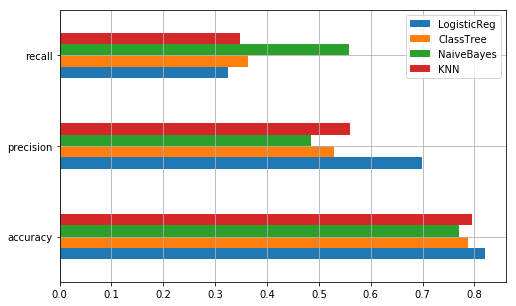

In [58]:
fig,ax = plt.subplots(figsize = (8,5))
metrics.plot(kind = 'barh', ax=ax)
ax.grid();

In [40]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1,-1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.5:
        return 'will default'
    else:
        return 'will pay'

In [41]:
pay=defaultCC[defaultCC['default'] == 0]

In [42]:
pay.head()

limit_bal  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
ID                                                                        
3     90000.0   34      0      0      0      0      0      0    29239.0   
4     50000.0   37      0      0      0      0      0      0    46990.0   
5     50000.0   57      0      0      0      0      0      0     8617.0   
6     50000.0   37      0      0      0      0      0      0    64400.0   
7    500000.0   29      0      0      0      0      0      0   367965.0   

    bill_amt2   ...     pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
ID              ...                                                       
3     14027.0   ...       1000.0    1000.0    1000.0    5000.0        0   
4     48233.0   ...       1200.0    1100.0    1069.0    1000.0        0   
5      5670.0   ...      10000.0    9000.0     689.0     679.0        0   
6     57069.0   ...        657.0    1000.0    1000.0     800.0        0   
7    412023.0   ...      38000.0   20239.0   13750.0   13770.0        0   

    grad_school  university  high_school  male  married  
ID                                                       
3             0           1            0     0        0  
4             0           1            0     0        1  
5             0           1            0     1        1  
6             1           0            0     1        0  
7             1           0            0     1        0  

[5 rows x 26 columns]

In [43]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal',4000),('age',50),('bill_amt1',500),('bill_amt2',35509),('bill_amt3',689),('bill_amt4',0),('bill_amt5',0),('bill_amt6',0),('pay_amt1',0),('pay_amt2',35509),('pay_amt3',0),('pay_amt4',0),('pay_amt5',0),('pay_amt6',0),('male',1),('grad_school',0),('university',1),('high_school',0),('married',1),('pay_0',-1),('pay_2',-1),('pay_3',-1),('pay_4',0),('pay_5',-1),('pay_6',0)])
new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'will default'